# **Importing libraries**

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
df= pd.read_csv('/content/credit card - credit card.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [7]:
df.shape

(30000, 25)

In [8]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [9]:
x = df.drop(['ID','default.payment.next.month'],axis=1)

In [10]:
y = df['default.payment.next.month']

In [11]:
y.value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

# Creating model

In [12]:
extr=ExtraTreesClassifier()

In [13]:
extr.fit(x,y)

ExtraTreesClassifier()

In [14]:
gini_value= pd.DataFrame(extr.feature_importances_, columns=['gini_values'])

In [15]:
features= pd.DataFrame(x.columns,columns=['feature_names'])

In [16]:
gains=pd.concat([features,gini_value],axis=1)

In [17]:
gains

,feature_names,gini_values
0,LIMIT_BAL,0.065635
1,SEX,0.011383
2,EDUCATION,0.033029
3,MARRIAGE,0.021110
4,AGE,0.066665
5,PAY_0,0.095279
6,PAY_2,0.047845
7,PAY_3,0.034715
8,PAY_4,0.029908
9,PAY_5,0.030830


<Axes: >

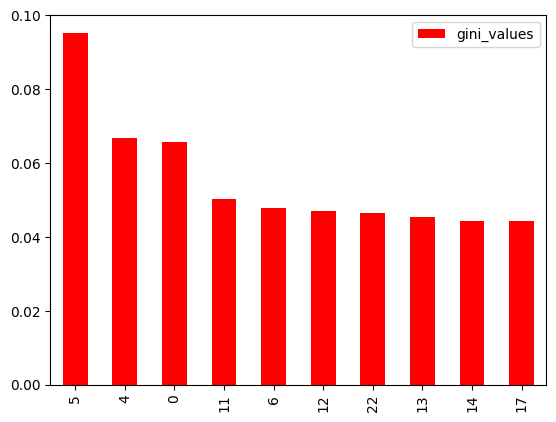

In [18]:
gains.nlargest(10,'gini_values').plot(kind='bar',color='red')

<Axes: >

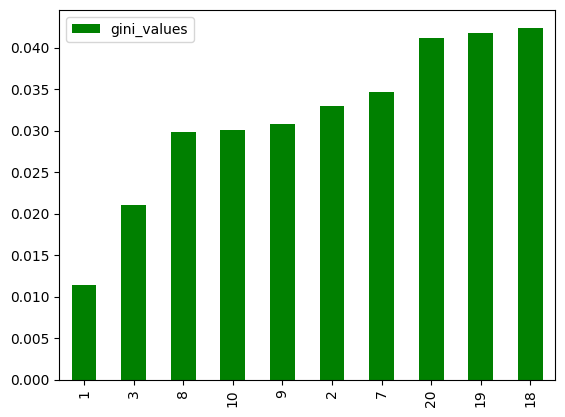

In [19]:
gains.nsmallest(10,'gini_values').plot(kind='bar',color='green')

<Axes: >

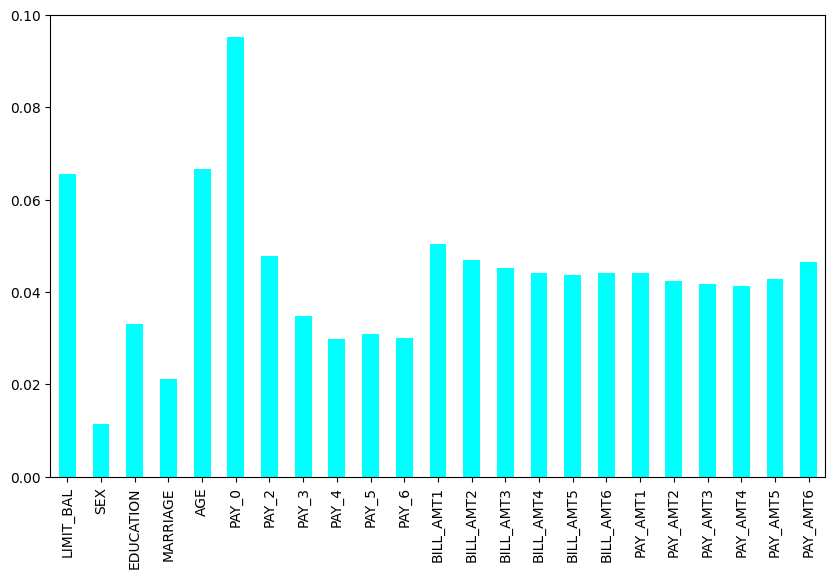

In [20]:
features=pd.Series(extr.feature_importances_,index=x.columns)
plt.figure(figsize=(10,6))
features.plot(kind='bar',color='cyan')

<Axes: >

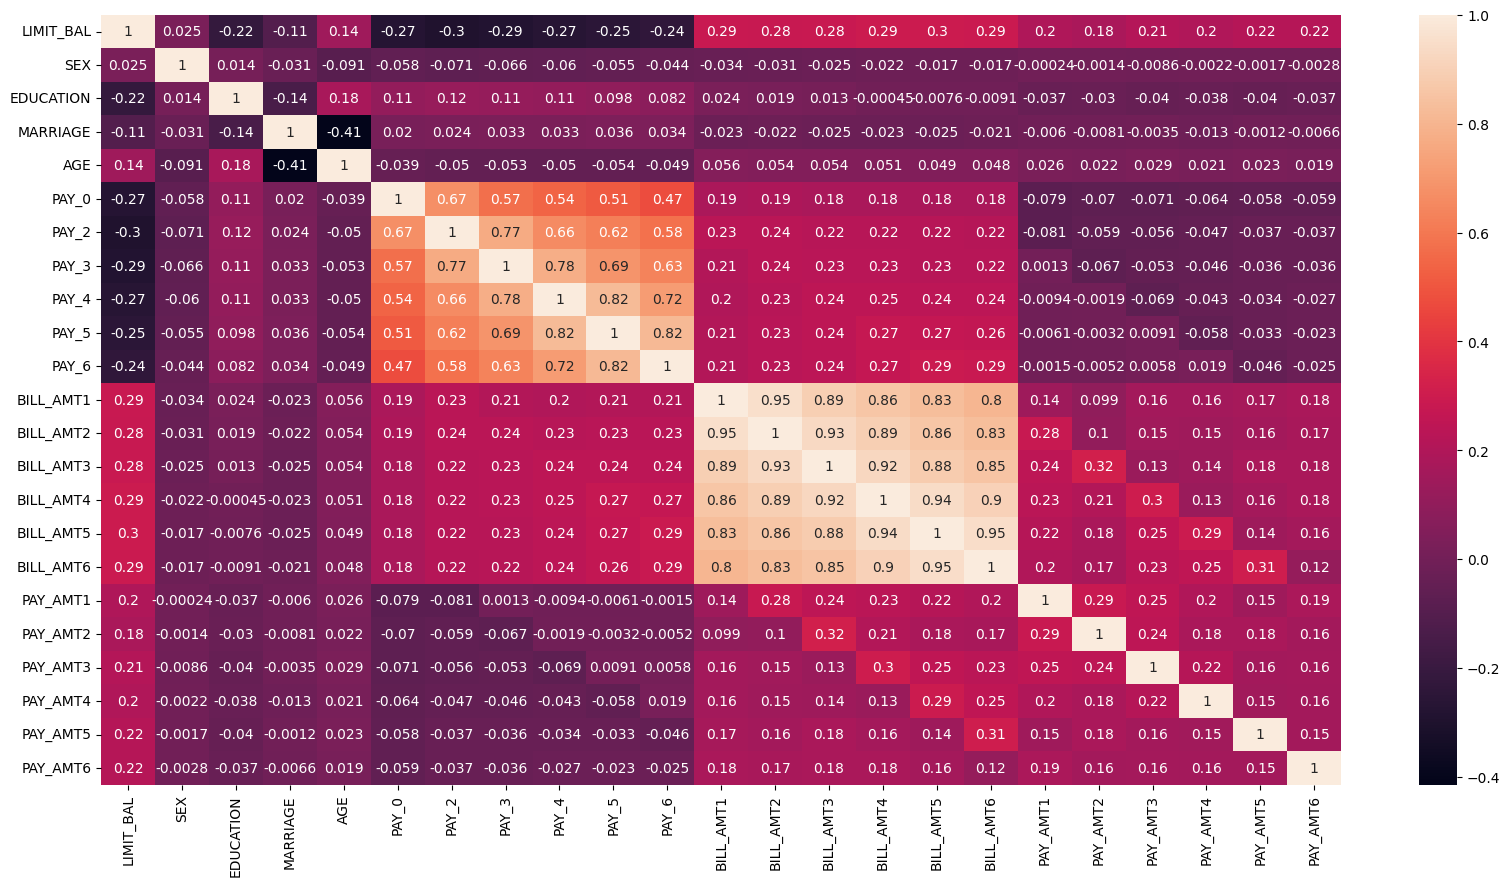

In [23]:
plt.figure(figsize=(20,10))
sn.heatmap(x.corr(),annot=True)

In [22]:
from sklearn.feature_selection import SelectKBest,f_classif,chi2,f_regression

In [25]:
df= pd.read_csv('/content/credit card - credit card.csv')

In [26]:
x = df.drop(['ID','default.payment.next.month'],axis=1)

In [27]:
y = df['default.payment.next.month']

In [29]:
model=SelectKBest(score_func=f_classif)

In [32]:
feature_score=model.fit(x,y)

In [40]:
gini_values=pd.DataFrame(fearture_score.scores_,columns=['gini_score'])

In [41]:
gini_values

,gini_score
0,724.068539
1,47.978854
2,23.547112
3,17.781271
4,5.788556
5,3537.714970
6,2239.169136
7,1757.466444
8,1476.845967
9,1304.591176


In [42]:
features_name=pd.DataFrame(x.columns,columns=['features_name'])

In [43]:
data= pd.concat([features_name,gini_values],axis=1)

In [44]:
data

,features_name,gini_score
0,LIMIT_BAL,724.068539
1,SEX,47.978854
2,EDUCATION,23.547112
3,MARRIAGE,17.781271
4,AGE,5.788556
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176


In [45]:
pd.Series(feature_score.scores_,index=x.columns)

LIMIT_BAL     724.068539
SEX            47.978854
EDUCATION      23.547112
MARRIAGE       17.781271
AGE             5.788556
PAY_0        3537.714970
PAY_2        2239.169136
PAY_3        1757.466444
PAY_4        1476.845967
PAY_5        1304.591176
PAY_6        1085.402485
BILL_AMT1      11.580532
BILL_AMT2       6.044238
BILL_AMT3       5.944388
BILL_AMT4       3.094745
BILL_AMT5       1.371087
BILL_AMT6       0.865820
PAY_AMT1      160.403810
PAY_AMT2      103.291524
PAY_AMT3       95.218011
PAY_AMT4       97.188000
PAY_AMT5       91.429801
PAY_AMT6       85.089045
dtype: float64

<Axes: >

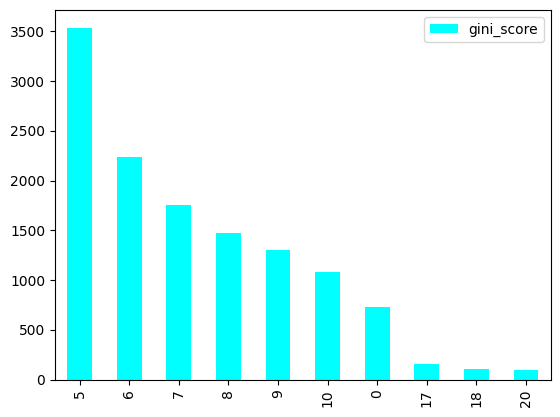

In [49]:
#plt.figure(figsize=(20,10))
data.nlargest(10,'gini_score').plot(kind='bar',color='cyan')